In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


batch_size = 32
num_classes = 150
epochs = 10

img_rows, img_cols, img_chns = 64, 64, 3
input_shape = (img_rows, img_cols, img_chns)


Using TensorFlow backend.


In [2]:
class_dict = dict()
for c, i in enumerate(sorted(os.listdir('../data'))):
    class_dict[c] = i

In [3]:

train_datagen = ImageDataGenerator(rescale=1/255.0, 
                                   validation_split=0.1,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory = '../data/',
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    subset = 'training')
validation_generator = train_datagen.flow_from_directory(directory = '../data/',
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    subset = 'validation')

Found 5654 images belonging to 150 classes.
Found 551 images belonging to 150 classes.


In [38]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same',
#                  input_shape=(img_rows, img_cols, img_chns)))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

In [3]:
# Hyper parameters
from efficientnet.keras import EfficientNetB0
from keras.applications import MobileNetV2
import keras.models as models
import keras.layers as layers

conv = EfficientNetB0(weights='imagenet', 
                     include_top=False, 
                     input_shape=input_shape)

for layer in conv.layers:
    layer.trainable = True

# Create the model
model = models.Sequential()
model.add(conv)

model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='sigmoid'))

# model.summary()


In [11]:
# opt = keras.optimizers.Adam(lr=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_json = model.to_json()
with open('./poke_id.json', "w") as json_file:
    json_file.write(model_json)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 2, 2, 1280)        4049564   
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               76950     
Total params: 4,782,386
Trainable params: 4,740,370
Non-trainable params: 42,016
_______________________________________

In [42]:
train_history = model.fit_generator(train_generator,
                                  steps_per_epoch = len(train_generator),
                                  epochs = epochs,
                                  validation_data = validation_generator,
                                  validation_steps = len(validation_generator),
                                  verbose = 1,
                                  shuffle=True)

Epoch 1/10
177/177 [==============================] - 99s 560ms/step - loss: 4.0587 - accuracy: 0.1349 - val_loss: 3.6271 - val_accuracy: 0.3049
Epoch 2/10
177/177 [==============================] - 75s 424ms/step - loss: 2.2059 - accuracy: 0.4333 - val_loss: 1.4222 - val_accuracy: 0.5172
Epoch 3/10
177/177 [==============================] - 79s 447ms/step - loss: 1.5553 - accuracy: 0.5753 - val_loss: 0.7567 - val_accuracy: 0.6098
Epoch 4/10
177/177 [==============================] - 80s 452ms/step - loss: 1.2404 - accuracy: 0.6597 - val_loss: 1.6840 - val_accuracy: 0.6316
Epoch 5/10
177/177 [==============================] - 80s 452ms/step - loss: 1.0982 - accuracy: 0.6953 - val_loss: 1.6498 - val_accuracy: 0.7132
Epoch 6/10
177/177 [==============================] - 80s 450ms/step - loss: 0.9131 - accuracy: 0.7409 - val_loss: 0.2656 - val_accuracy: 0.7187
Epoch 7/10
177/177 [==============================] - 81s 460ms/step - loss: 0.8174 - accuracy: 0.7726 - val_loss: 1.7955 - val_ac

In [44]:
model.save_weights('./pok_classifier_chkpt1.h5')

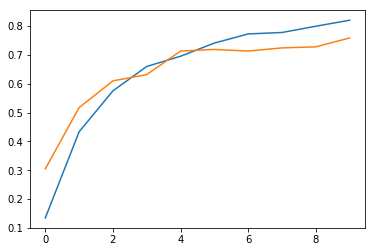

In [43]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])


In [45]:
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [46]:
train_history = model.fit_generator(train_generator,
                                  steps_per_epoch = len(train_generator),
                                  epochs = 3,
                                  validation_data = validation_generator,
                                  validation_steps = len(validation_generator),
                                  verbose = 1,
                                  shuffle=True)

Epoch 1/3
177/177 [==============================] - 103s 583ms/step - loss: 0.4550 - accuracy: 0.8659 - val_loss: 1.1611 - val_accuracy: 0.8276
Epoch 2/3
177/177 [==============================] - 79s 447ms/step - loss: 0.3291 - accuracy: 0.9013 - val_loss: 0.0307 - val_accuracy: 0.8348
Epoch 3/3
177/177 [==============================] - 80s 454ms/step - loss: 0.3026 - accuracy: 0.9098 - val_loss: 1.3103 - val_accuracy: 0.8512


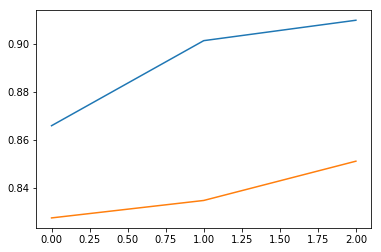

In [47]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])

In [48]:
model.save_weights('./pok_classifier_chkpt2.h5')

In [50]:
test_datagen = ImageDataGenerator(rescale=1/255.0)
test_generator = test_datagen.flow_from_directory(directory = '../test/',
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size)
model.evaluate_generator(test_generator, verbose=1)

Found 615 images belonging to 150 classes.


[0.0005337128532119095, 0.8536585569381714]

In [62]:
model.load_weights('./pok_classifier_chkpt2.h5')

In [63]:
train_datagen = ImageDataGenerator(rescale=1/255.0, 
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=15,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory = '../data/',
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size)

Found 6205 images belonging to 150 classes.


In [64]:
train_history = model.fit_generator(train_generator,
                                  steps_per_epoch = len(train_generator),
                                  epochs = 3,
                                  validation_data = validation_generator,
                                  validation_steps = len(validation_generator),
                                  verbose = 1,
                                  shuffle=True)

Epoch 1/3
194/194 [==============================] - 90s 466ms/step - loss: 0.3426 - accuracy: 0.8996 - val_loss: 0.1108 - val_accuracy: 0.8603
Epoch 2/3
194/194 [==============================] - 88s 455ms/step - loss: 0.3219 - accuracy: 0.9054 - val_loss: 0.1374 - val_accuracy: 0.9020
Epoch 3/3
194/194 [==============================] - 85s 439ms/step - loss: 0.2827 - accuracy: 0.9152 - val_loss: 0.1268 - val_accuracy: 0.9093


In [65]:
model.evaluate_generator(test_generator, verbose=1)

20/20 [==============================] - 7s 334ms/step


[0.3658708930015564, 0.8569105863571167]

In [69]:
model.save_weights('./poke_id_chkpt3.h5')

In [5]:
model.load_weights('./poke_id_chkpt3.h5')

In [6]:
test_datagen = ImageDataGenerator(rescale=1/255.0)
test_generator = test_datagen.flow_from_directory(directory = '../test/',
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size)

Found 615 images belonging to 150 classes.


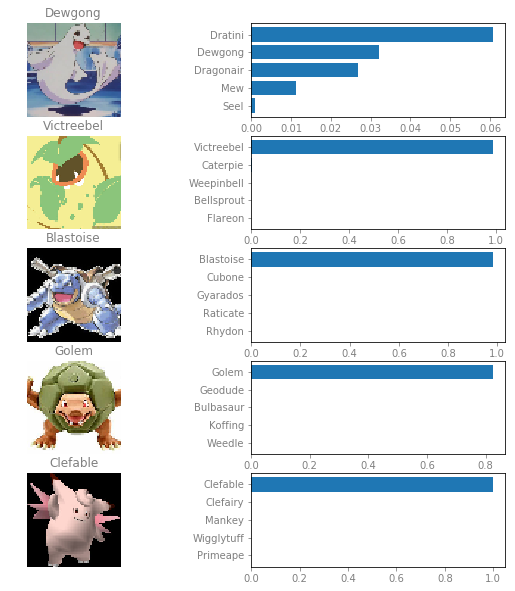

In [9]:
COLOR='grey'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
for i in range(5):
    batchno = np.random.choice(range(len(test_generator)), 1)[0]
    item = test_generator.__getitem__(batchno)
    p = model.predict(item[0])
    k = np.random.choice(range(len(item[1])),1)[0]
    axes[i,0].imshow(item[0][k])
    axes[i,0].axis('off')
    
    axes[i,0].title.set_text(class_dict[item[1][k].argmax()])
    inds = p[k].argsort()[-5:][::-1]
    df=pd.DataFrame({'Poke':[class_dict[c] for c in inds],'Probability':[p[k, c] for c in inds]} )
    cell_text = []
    for row in range(len(df)):
        cell_text.append([df.iloc[row][0], str(round(df.iloc[row][1],6))])
    axes[i,1].barh(df.Poke, df.Probability)
    axes[i,1].invert_yaxis()
    axes[i,1].patch.set_alpha(0.0)


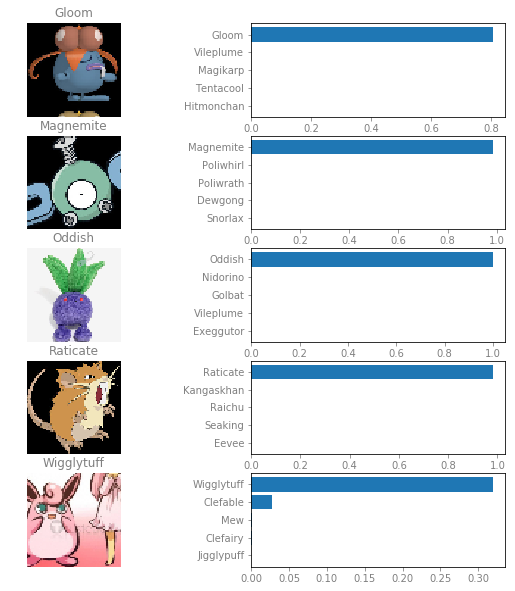

In [13]:

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
for i in range(5):
    batchno = np.random.choice(range(len(test_generator)), 1)[0]
    item = test_generator.__getitem__(batchno)
    p = model.predict(item[0])
    k = np.random.choice(range(len(item[1])),1)[0]
    k = 3
    axes[i,0].imshow(item[0][k])
    axes[i,0].axis('off')
    
    axes[i,0].title.set_text(class_dict[item[1][k].argmax()])
    inds = p[k].argsort()[-5:][::-1]
    df=pd.DataFrame({'Poke':[class_dict[c] for c in inds],'Probability':[p[k, c] for c in inds]} )
    cell_text = []
    for row in range(len(df)):
        cell_text.append([df.iloc[row][0], str(round(df.iloc[row][1],6))])
    axes[i,1].barh(df.Poke, df.Probability)
    axes[i,1].invert_yaxis()
    axes[i,1].patch.set_alpha(0.0)
